#### Import necessary library

In [13]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU
from tensorflow.keras import layers
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
train_dir = 'C:\\Users\\xinga\\OneDrive\\文档\\GitHub\\AI-Project\\dataset\\aclImdb\\train'
val_dir = 'C:\\Users\\xinga\\OneDrive\\文档\\GitHub\\AI-Project\\dataset\\aclImdb\\test'

batch_size = 32

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    class_names=['neg', 'pos'])

raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    val_dir,
    batch_size=batch_size,
    class_names=['neg', 'pos'])

Found 25000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


In [3]:
raw_train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
# Define the text vectorization layer
vectorize_layer = layers.TextVectorization(
    max_tokens=20000,
    output_mode='int',
    output_sequence_length=600)

In [17]:
# Fit the text vectorization layer to the training data
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [18]:
# Define a function to apply the text vectorization layer to the data
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [19]:
# Apply the text vectorization layer to the training and validation data
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)

In [20]:
train_ds

<MapDataset element_spec=(TensorSpec(shape=(None, 600), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=16))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
# model = tf.keras.Sequential([
#     layers.Embedding(input_dim=10000, output_dim=16),
#     SimpleRNN(16),
#     layers.Dense(1, activation='sigmoid')
# ])
# model = tf.keras.Sequential([
#     layers.Embedding(input_dim=10000, output_dim=64),
#     layers.GRU(64),
#     layers.Dense(1, activation='sigmoid')
# ])


In [25]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Fit the model to the training data
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3)

Epoch 1/3
782/782 [==============================] - 278s 352ms/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6934 - val_accuracy: 0.5033
Epoch 2/3
782/782 [==============================] - 278s 355ms/step - loss: 0.6931 - accuracy: 0.5059 - val_loss: 0.6936 - val_accuracy: 0.5030
Epoch 3/3
782/782 [==============================] - 299s 382ms/step - loss: 0.6859 - accuracy: 0.5191 - val_loss: 0.6956 - val_accuracy: 0.5032


In [ ]:
# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

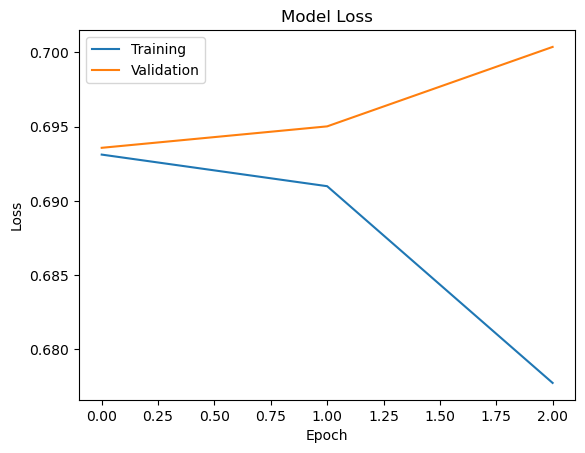

In [15]:
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()